Думаю, вы уже познакомились со стандартными функциями в numpy для вычисления станадртных оценок (среднего, медианы и проч), однако в анализе реальных данных вы, как правило, будете работать с целым датасетом.

В этом разделе мы познакомимся с вычислением описательных статистик для целого датасета.

Большинство из них вычиляются одной командой (методом) describe

С вычислением корреляцонной матрицы мы уже сталкивались во 2 модуле, но освежим и ее

И отдельное внимание уделим вычислению условных и безусловных пропорций.


В датасете framingham.csv представлены данные, которые группа ученых из Фрамингема (США) использовала для выявления риска заболевания ишемической болезнью сердца в течение 10 лет.

Демографические данные: 

    sex (male): пол, мужчина (1) или женщина (0) 

    age: возраст 
    
    education: уровень образования (0-4: школа-колледж)
    
Поведенческие данные: 

    currentSmoker: курильщик (1) или нет (0)

    cigsPerDay: количество выкуриваемых сигарет в день (шт.)

Медицинская история:

    BPMeds: принимает ли пациент препараты для регулировки артериального давления (0 - нет, 1 - да)

    prevalentStroke: случался ли у пациента сердечный приступ (0 - нет, 1 - да)

    prevalentHyp: страдает ли пациент гипертонией (0 - нет, 1 - да)

    diabetes: страдает ли пациент диабетом (0 - нет, 1 - да)

Физическое состояние:

    totChol: уровень холестерина

    sysBP: систолическое (верхнее) артериальное давление 

    diaBP: диастолическое (нижнее) артериальное давление 

    BMI: индекс массы тела - масса (кг) / рост^2 (в метрах)

    heartRate: пульс

    glucose: уровень глюкозы

Целевая переменная (на которую авторы строили регрессию):

    TenYearCHD: риск заболевания ишемической болезнью сердца в течение 10 лет

Импорт библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.mlab as mlab
%matplotlib inline

Импорт датасета:

In [2]:
df = pd.read_csv('framingham.csv')

Шапка датасета:

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Размер датасета:

In [4]:
df.shape

(4240, 16)

Названия столбцов датасета понадобятся нам, чтобы обращаться к отдельным признакам пациентов:

In [5]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Поиск missing values:

In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Видим, что у 105 пациентов нет данных об образовании, у 388 - об уровне глюкозы. Недостающие данные могут стать причиной некорректных значений оценок, и от них лучше избавиться.

Количество строк, в которых есть missing values

In [7]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Общее количество строк с пропущенными значениями: ', count)

Общее количество строк с пропущенными значениями:  582


Итого у нас 582 строки, в которых не хватает каких-нибудь данных

Найдем соотношение строк с недостающими данными и общего кол-ва строк

Если их будет относительно немного, то выгоднее избавиться от неполных строк, а если много, то надо посмотреть, в каких столбцах больше всего не хватает данных - возможно, выгоднее будет избавляться от них.

In [8]:
count/df.shape[0]

0.13726415094339622

Т.к. соотношение мало (13%), можем отбросить строки с отсутствующими данными):

In [10]:
df.dropna(axis=0,inplace=True)

In [11]:
df.shape

(3658, 16)

Размеры датасета после удаления missing values:

Получение описательных статистик при помощи фунции describe: 

In [12]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Данные полученные из describe:

    mean - среднее значение
    std - стандартное (среднеквадратичное) отклонение. 
    min - минимальное значение 
    max - максимальное значение
    25% - нижняя квартиль (медиана меньшей/левой половины выборки)
    50% - медиана
    75% - верхняя квартиль (медиана большей/правой половины выборки)

Далее строим тепловую карту корреляционной матрицы при помощи функции heatmap и саму корреляционную матрицу. Чем насыщеннее цвет, тем сильнее корреляция.

<AxesSubplot:>

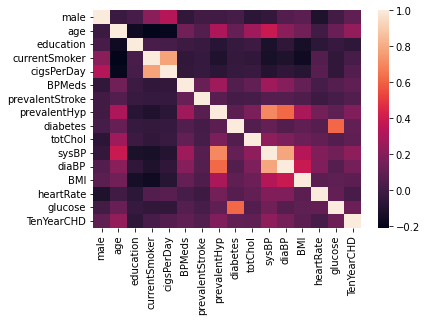

In [13]:
sn.heatmap(df.corr())

Можем увидеть сильную корреляцию между диастолическим и систолическим давлением. Корреляции целевой переменной со всеми признаками невелики. Это значит, что линейная связь между ними очень слабая

In [14]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024412,0.017729,0.206114,0.330322,-0.052124,-0.002312,0.001424,0.013819,-0.070321,-0.045358,0.051872,0.073111,-0.115285,0.002940,0.091688
age,-0.024412,1.000000,-0.159499,-0.210771,-0.189295,0.134732,0.050893,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349,0.233983
education,0.017729,-0.159499,1.000000,0.025251,0.013790,-0.013739,-0.030386,-0.078828,-0.039627,-0.013522,-0.124360,-0.058059,-0.137555,-0.064214,-0.031998,-0.063279
currentSmoker,0.206114,-0.210771,0.025251,1.000000,0.773913,-0.051923,-0.038150,-0.108078,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.053242,0.019165
cigsPerDay,0.330322,-0.189295,0.013790,0.773913,1.000000,-0.046504,-0.036286,-0.070460,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726,0.052014
BPMeds,-0.052124,0.134732,-0.013739,-0.051923,-0.046504,1.000000,0.113125,0.262910,0.049066,0.094083,0.271263,0.199630,0.105642,0.012889,0.054232,0.089152
prevalentStroke,-0.002312,0.050893,-0.030386,-0.038150,-0.036286,0.113125,1.000000,0.066057,0.009625,0.012736,0.061070,0.055834,0.036496,-0.017019,0.016061,0.048366
prevalentHyp,0.001424,0.306239,-0.078828,-0.108078,-0.070460,0.262910,0.066057,1.000000,0.080556,0.166655,0.697675,0.617734,0.302949,0.146818,0.086942,0.181387
diabetes,0.013819,0.109092,-0.039627,-0.041849,-0.036961,0.049066,0.009625,0.080556,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.614820,0.093431
totChol,-0.070321,0.268252,-0.013522,-0.051034,-0.030400,0.094083,0.012736,0.166655,0.048451,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884,0.091338


Со средним, стандартным отклонением, медианой и корреляцией все ясно.

Давайте выясним, как вычислять выборочные пропорции в датасете

как вычислить долю мужчин в выборке?

Длинный способ: посчитаем количество всех мужчин в выборке при помощи метода value_counts() и поделим его на общее количество пациентов

In [15]:
m=df['male'].value_counts() # счетчик разных значений в dataframe
print("Общее количество мужчин и женщин\n", m)
print("Общее количество мужчин:", m[1])

Общее количество мужчин и женщин
 0    2035
1    1623
Name: male, dtype: int64
Общее количество мужчин: 1623


In [16]:
p_male=m[1]/df.shape[0] # считаем пропорцию мужчин среди всех пациентов
print("Доля мужчин среди всех пациентов:", p_male)

Доля мужчин среди всех пациентов: 0.4436850738108256


Короткий способ: задать в методе value_counts() специальный параметр, который будет вычислиять не абсолютные частоты (количества), а относительные (пропорции)

In [17]:
df['male'].value_counts(normalize = True ) # параметр normalize = True позволяет считать сразу пропорцию вместо количества

0    0.556315
1    0.443685
Name: male, dtype: float64

С абсолютными пропорциями тоже ясно. Как насчет условных?

Как вычислить долю курильщиков среди мужчин и среди женщин:

In [18]:
male_groups=df.groupby('male') # groupgy разбивает датасет на группы по признаку пола

Внутри каждой группы можем взять счетчик value_counts() для признака currentSmoker

пол 0 - женщина, пол 1 - мужчина.

In [19]:
male_groups['currentSmoker'].value_counts() # можем отдельно вычислить количество курильщиков среди мужчин и среди женщин

male  currentSmoker
0     0                1227
      1                 808
1     1                 981
      0                 642
Name: currentSmoker, dtype: int64

Итак: курит 808 женщин и 981 мужчин

Теперь вычислим пропорции курильщиков внутри каждого пола.

Вы можете убедиться, что это именно условные пропорции, поделив количество курящих мужчин на общее количество мужчин и сравнив результаты, или если заметите, что вероятности внутри каждой группы пола дают в сумме 1

In [20]:
ms=male_groups['currentSmoker'].value_counts(normalize = True) 
print('Доли курильщиков среди мужчин и среди женщин\n',ms)
print('Доля курильщиков среди мужчин:',ms[1,1])

Доли курильщиков среди мужчин и среди женщин
 male  currentSmoker
0     0                0.602948
      1                0.397052
1     1                0.604436
      0                0.395564
Name: currentSmoker, dtype: float64
Доля курильщиков среди мужчин: 0.6044362292051756


Как вычислить среднее значение пульса у курящих и не курящих:

In [21]:
smok_groups=df.groupby('currentSmoker')

In [22]:
smok_groups['heartRate'].mean()

currentSmoker
0    75.134831
1    76.353270
Name: heartRate, dtype: float64

Как вычислить долю пациентов группы риска среди курящих и не курящих:

In [23]:
srisk=smok_groups['TenYearCHD'].value_counts(normalize = True)
print('Доли группы риска среди курильщиков и не курильщиков\n',srisk)
print('Доля группы риска среди курильщиков:',srisk[1,1])

Доли группы риска среди курильщиков и не курильщиков
 currentSmoker  TenYearCHD
0              0             0.854468
               1             0.145532
1              0             0.840693
               1             0.159307
Name: TenYearCHD, dtype: float64
Доля группы риска среди курильщиков: 0.1593068753493572


Трюк по вычислению частот для переменных-индикаторов (значения 1 и 0): сумма значений равна количеству единиц в выборке, а значит, среднее равно доле единиц, то есть частоте:

In [24]:
smok_groups['TenYearCHD'].mean()

currentSmoker
0    0.145532
1    0.159307
Name: TenYearCHD, dtype: float64